# Exercise 1
## Download, read and visualize H-SAF ASCAT SSM CDR

## Importing packages
Here we first import the python packages which we will need throughout this exercise. 

In [20]:
import os #Miscellaneous operating system interfaces
import pandas as pd #Python data analysis library for working with data frames and basic analysis
import ascat.h_saf as hsaf #Package for reading hsaf data
import matplotlib.pyplot as plt #Plotting library
from ismn.interface import ISMN_Interface
import pytesmo.temporal_matching as tmatch
import pytesmo.time_series.anomaly as ts_anom # Package for time series analysis and validation

## Set paths for H115 - Metop ASCAT SSM CDR 12.5 km sampling
Here we need to set the paths to where the data is stored. If you have stored all the hsaf data to the same folder, you will only need to change the path_test_data variable to your hsaf folder. 

In [21]:
path_test_data = '/home/mavl/hsaf/'
h115_path = os.path.join(path_test_data, 'h115')
h116_path =os.path.join(path_test_data, 'h116')
static_layer_path = os.path.join(path_test_data, 'static_layer')
grid_path = os.path.join(path_test_data,'warp5_grid')

## Read H115 - Metop ASCAT SSM CDR 12.5 km sampling
We need to initialize the reader, where we need to set the paths of the data, the grid file and the static layers. 

Then the data can be read using either longitude and latitude or per gridpoint. You can find the grid of the H115 product here: 
http://rs.geo.tuwien.ac.at/dv/dgg/

The hsaf package automatically reads the data as a pandas dataframe. Now you can use the full functionality of pandas to do a first analysis of your dataset. 
You can have a quick look at the data by using the .head() function, showing you the data structure. For the meaning of the different columns have a look at the Product User Manual: http://hsaf.meteoam.it/documents/PUM/ASCAT_SSM_CDR_PUM_v0.8.pdf
Most important for getting to know the dataset are the columns 'sm'. 

In [22]:
h115_reader = hsaf.AscatSsmDataRecord(h115_path, grid_path, static_layer_path=static_layer_path)
h115_ts=h115_reader.read(15,48)
#h115_ts=h115_reader.read(-5.38,41.2)
h115_ts.head()

,proc_flag,slope40,conf_flag,slope40_noise,sigma40_noise,corr_flag,sm,sat_id,ssf,sigma40,dir,sm_noise,snow_prob,frozen_prob,abs_sm_gldas,abs_sm_noise_gldas,abs_sm_hwsd,abs_sm_noise_hwsd
2007-01-01 19:24:43.124976,0,-0.110,0,0.00065,0.09,0,78.290001,3,1,-8.24,0,3.89,44,57,NaN,NaN,NaN,NaN
2007-01-02 19:04:07.500000,0,-0.110,0,0.00065,0.09,0,45.529999,3,1,-9.03,0,4.15,44,82,NaN,NaN,NaN,NaN
2007-01-03 20:23:26.250000,0,-0.110,0,0.00065,0.09,0,50.329998,3,1,-8.92,0,4.00,44,71,NaN,NaN,NaN,NaN
2007-01-04 08:36:56.250000,0,-0.111,0,0.00065,0.09,0,55.779999,3,1,-8.79,1,3.98,33,57,NaN,NaN,NaN,NaN
2007-01-05 09:56:15.000000,0,-0.111,0,0.00065,0.10,0,64.010002,3,1,-8.59,1,4.15,44,50,NaN,NaN,NaN,NaN


In [23]:
h115_reader.read(15,48)

,proc_flag,slope40,conf_flag,slope40_noise,sigma40_noise,corr_flag,sm,sat_id,ssf,sigma40,dir,sm_noise,snow_prob,frozen_prob,abs_sm_gldas,abs_sm_noise_gldas,abs_sm_hwsd,abs_sm_noise_hwsd
2007-01-01 19:24:43.124976,0,-0.110,0,0.00065,0.09,0,78.290001,3,1,-8.240000,0,3.89,44,57,NaN,NaN,NaN,NaN
2007-01-02 19:04:07.500000,0,-0.110,0,0.00065,0.09,0,45.529999,3,1,-9.030000,0,4.15,44,82,NaN,NaN,NaN,NaN
2007-01-03 20:23:26.250000,0,-0.110,0,0.00065,0.09,0,50.329998,3,1,-8.920000,0,4.00,44,71,NaN,NaN,NaN,NaN
2007-01-04 08:36:56.250000,0,-0.111,0,0.00065,0.09,0,55.779999,3,1,-8.790000,1,3.98,33,57,NaN,NaN,NaN,NaN
2007-01-05 09:56:15.000000,0,-0.111,0,0.00065,0.10,0,64.010002,3,1,-8.590000,1,4.15,44,50,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-28 20:14:45.000009,0,-0.109,0,0.00065,0.09,0,59.930000,4,1,-8.679999,0,3.90,11,57,NaN,NaN,NaN,NaN
2018-12-29 08:28:14.998972,0,-0.110,0,0.00065,0.09,0,37.680000,4,1,-9.210000,1,4.09,22,57,NaN,NaN,NaN,NaN
2018-12-29 18:47:52.500019,0,-0.110,0,0.00065,0.09,0,35.770000,3,1,-9.260000,0,4.17,22,57,NaN,NaN,NaN,NaN
2018-12-30 09:47:37.500028,0,-0.110,0,0.00065,0.09,0,69.939995,4,1,-8.440000,1,4.08,33,32,NaN,NaN,NaN,NaN


## Plot H115 Soil Moisture data
Now that we have loaded the data we can have a first look at the time series.Soil moisture is available as percentage saturation. If you wish to calculate absolute soil moisture values, a possibility is to multiply the soil moisture data with the porosity value which is stored. 

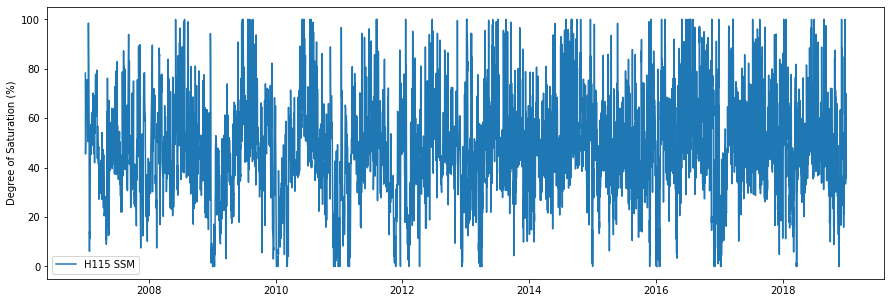

In [25]:
# show complete time series
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(h115_ts['sm'], label='H115 SSM')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()
plt.show()

/tmp/ipykernel_26400/377712696.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax.plot(h115_ts['2018']['sm'],  label='H115 SSM')


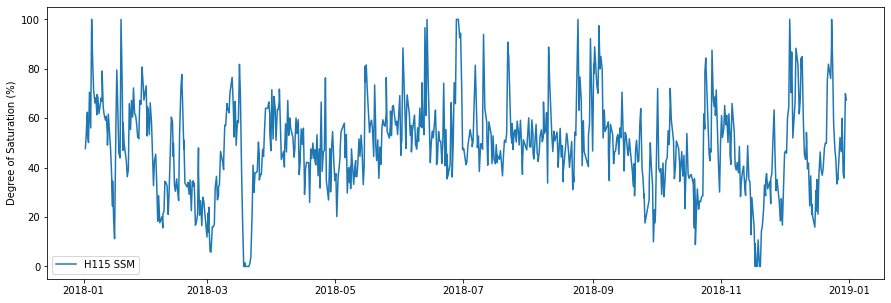

In [26]:
# show time series subset
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(h115_ts['2018']['sm'],  label='H115 SSM')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()
plt.show()

As discussed in the live session, soil moisture is affected by snow cover and frozen soils. We can see this in the subset of 2018, where a clear drop in soil moisture is visible in March, which is not likely due to changes in soil moisture. 
Hence we mask for frozen soils and snow cover using the probability mask. Please note, this is not the same as masking using in situ data or model data, but only a probability of that these conditions occur.

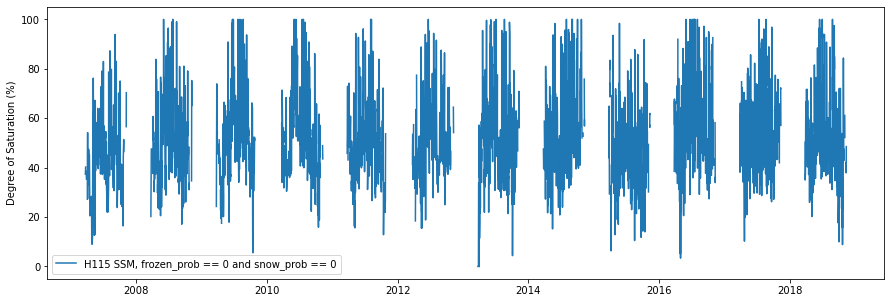

In [28]:
mask = (h115_ts['frozen_prob'] > 0) | (h115_ts['snow_prob'] > 0)
h115_ts = h115_ts.mask(mask)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(h115_ts['sm'], label='H115 SSM, frozen_prob == 0 and snow_prob == 0')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

## Read ISMN Data

In [53]:
data_path = "/home/mavl/hsaf/insitu/Data_separate_files_20070517_20220101_9279_Z8Ar_20220318/"
ismn_data = ISMN_Interface(data_path)

idx=ismn_data.get_dataset_ids(variable='soil_moisture')
insitu_ts, meta=ismn_data.read(idx[0], return_meta=True)
insitu_match = tmatch.df_match(h115_ts, insitu_ts)
df = h115_ts.join(insitu_match)


Found existing ismn metadata in /home/mavl/hsaf/insitu/Data_separate_files_20070517_20220101_9279_Z8Ar_20220318/python_metadata/Data_separate_files_20070517_20220101_9279_Z8Ar_20220318.csv.


<AxesSubplot:>

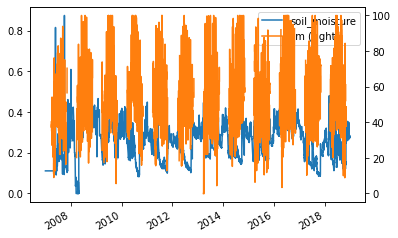

In [54]:
df[['soil_moisture','sm']].plot(secondary_y='sm')

## Exercise
To complete the exercise, please locate a ISMN station of your interest, download the HSAF cell and ISMN data, read in the data using the longitude and latitude. DO a temporal matching of the data and plot the time series as shown aboveand upload this to the Padlet with a concise description and first interpretation. 